In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [2]:
data=pd.read_csv('vehicle.csv')
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [4]:
data.shape

(846, 19)

In [5]:
data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
#Replace Null values with median
data.iloc[:,:-1]=(data.drop('class',axis=1)).apply(lambda col:col.fillna(col.median()),axis=0)
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

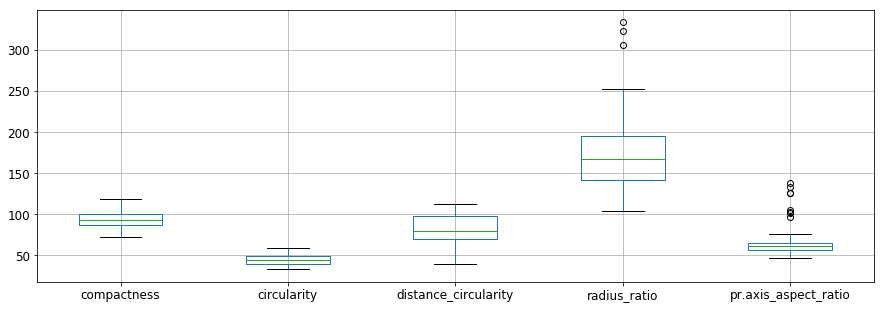

In [7]:
#Boxplot
data.iloc[:,:5].boxplot(figsize=(15,5),fontsize=12)

<b>radius_ratio,pr.axis_aspect_ratio have outliers.

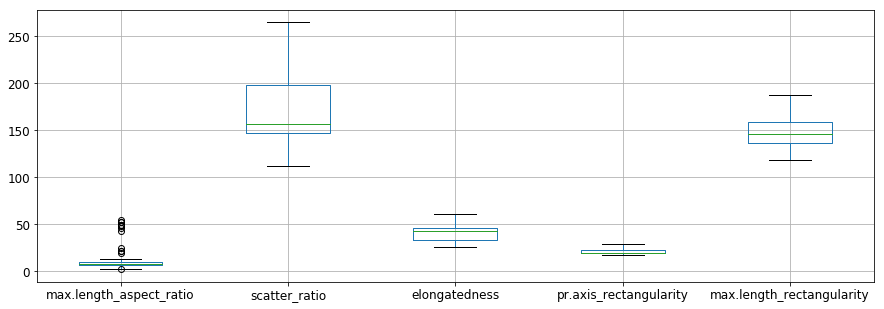

In [8]:
data.iloc[:,5:10].boxplot(figsize=(15,5),fontsize=12)

<b>max.length_aspect_ratio has outliers.

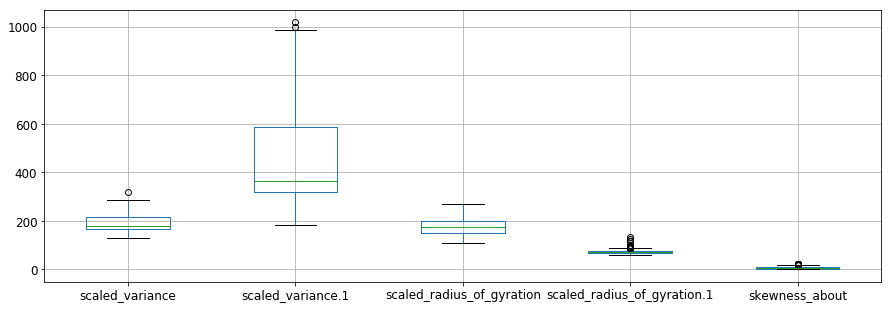

In [9]:
data.iloc[:,10:15].boxplot(figsize=(15,5),fontsize=12)

<b>scaled_variance,scaled_variance.1,scaled_radius_of_gyration.1 and skewness_about have outliers. 

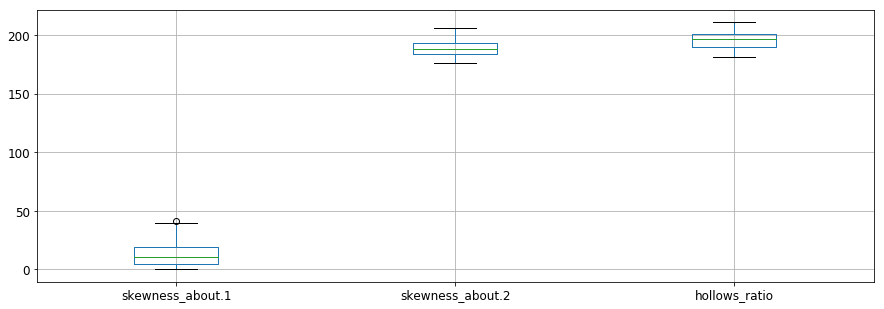

In [10]:
data.iloc[:,15:].boxplot(figsize=(15,5),fontsize=12)

<b>skewness_about.1 has outliers

In [11]:
#Outlier Detection
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
Max=q3+1.5*IQR
Min=q1-1.5*IQR

In [12]:
outlier_rows={row for row in range(data.shape[0]) for col in range(data.shape[1]-1) \
              if(data.iloc[row,col]>Max[col] or data.iloc[row,col]<Min[col])}

In [13]:
len(outlier_rows)

33

<b>33 rows contain outliers.

In [14]:
#Outlier Treatment
for row in outlier_rows:
    for col in range(data.shape[1]-1):
        if(data.iloc[row,col]>Max[col]):
            data.iloc[row,col]=Max[col]
        if(data.iloc[row,col]<Min[col]):
            data.iloc[row,col]=Min[col]

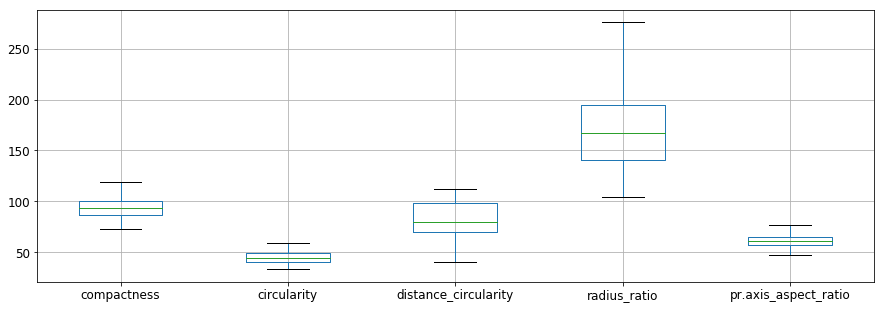

In [15]:
data.iloc[:,:5].boxplot(figsize=(15,5),fontsize=12)

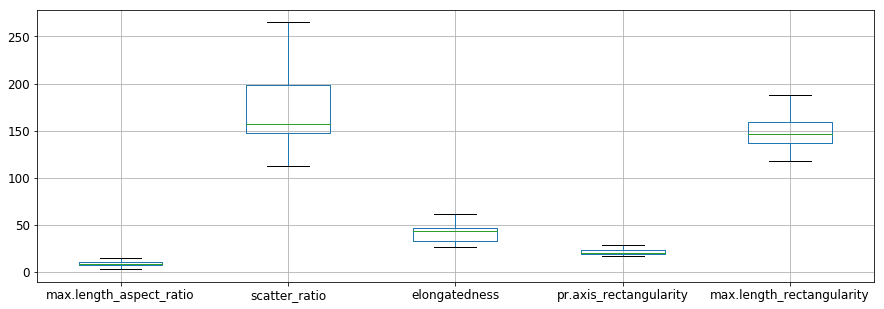

In [16]:
data.iloc[:,5:10].boxplot(figsize=(15,5),fontsize=12)

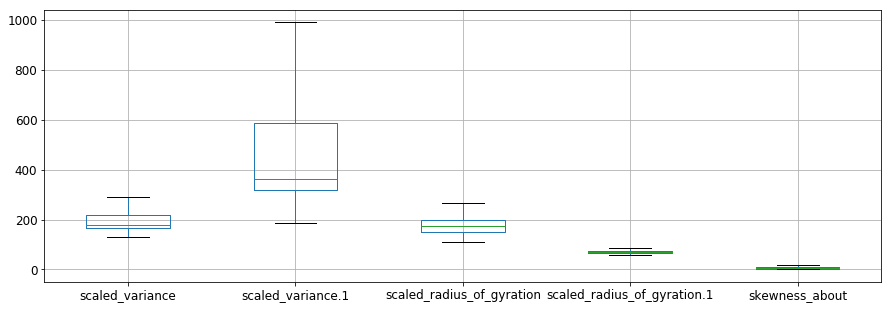

In [17]:
data.iloc[:,10:15].boxplot(figsize=(15,5),fontsize=12)

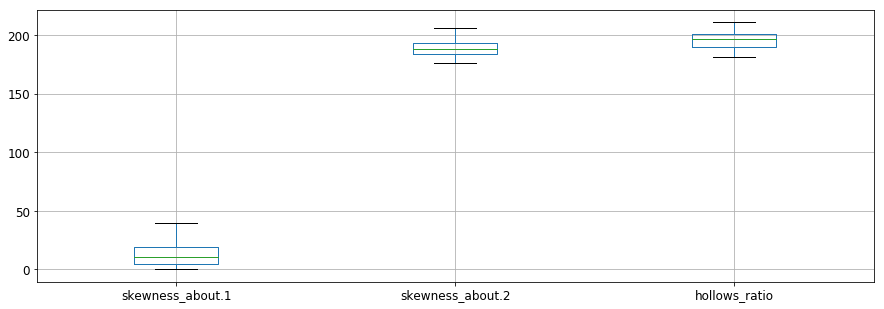

In [18]:
data.iloc[:,15:].boxplot(figsize=(15,5),fontsize=12)

<b>All outliers have been removed.

In [19]:
data.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684887,0.789928,0.704177,0.166905,0.437331,0.812620,-0.788750,0.813694,0.676143,0.765062,0.814141,0.585243,-0.263751,0.233761,0.157026,0.298537,0.365552
circularity,0.684887,1.000000,0.792320,0.630813,0.197870,0.523972,0.847938,-0.821472,0.843400,0.961318,0.799099,0.836074,0.925816,0.056482,0.144552,-0.011382,-0.104426,0.046351
distance_circularity,0.789928,0.792320,1.000000,0.780846,0.228494,0.611158,0.905076,-0.911307,0.893025,0.774527,0.864753,0.886353,0.705771,-0.247726,0.113352,0.265497,0.146098,0.332732
radius_ratio,0.704177,0.630813,0.780846,1.000000,0.680872,0.497668,0.750288,-0.805868,0.724116,0.576439,0.794518,0.734821,0.544864,-0.328059,0.049200,0.177319,0.391791,0.480752
pr.axis_aspect_ratio,0.166905,0.197870,0.228494,0.680872,1.000000,0.230382,0.173201,-0.275304,0.142643,0.149545,0.239357,0.157296,0.148468,-0.246665,-0.057076,-0.027409,0.368533,0.389627
max.length_aspect_ratio,0.437331,0.523972,0.611158,0.497668,0.230382,1.000000,0.439612,-0.456838,0.434980,0.608645,0.415483,0.398807,0.374258,-0.257113,0.084582,0.129266,0.055451,0.372028
scatter_ratio,0.812620,0.847938,0.905076,0.750288,0.173201,0.439612,1.000000,-0.971601,0.989751,0.809083,0.952882,0.993085,0.799875,-0.012569,0.073986,0.212448,0.005628,0.118817
elongatedness,-0.788750,-0.821472,-0.911307,-0.805868,-0.275304,-0.456838,-0.971601,1.000000,-0.948996,-0.775854,-0.940389,-0.954096,-0.766314,0.102532,-0.052501,-0.185046,-0.115126,-0.216905
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.724116,0.142643,0.434980,0.989751,-0.948996,1.000000,0.810934,0.938593,0.988209,0.796690,0.003542,0.083198,0.214717,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961318,0.774527,0.576439,0.149545,0.608645,0.809083,-0.775854,0.810934,1.000000,0.747438,0.794810,0.866450,0.044230,0.136283,0.001458,-0.103948,0.076770


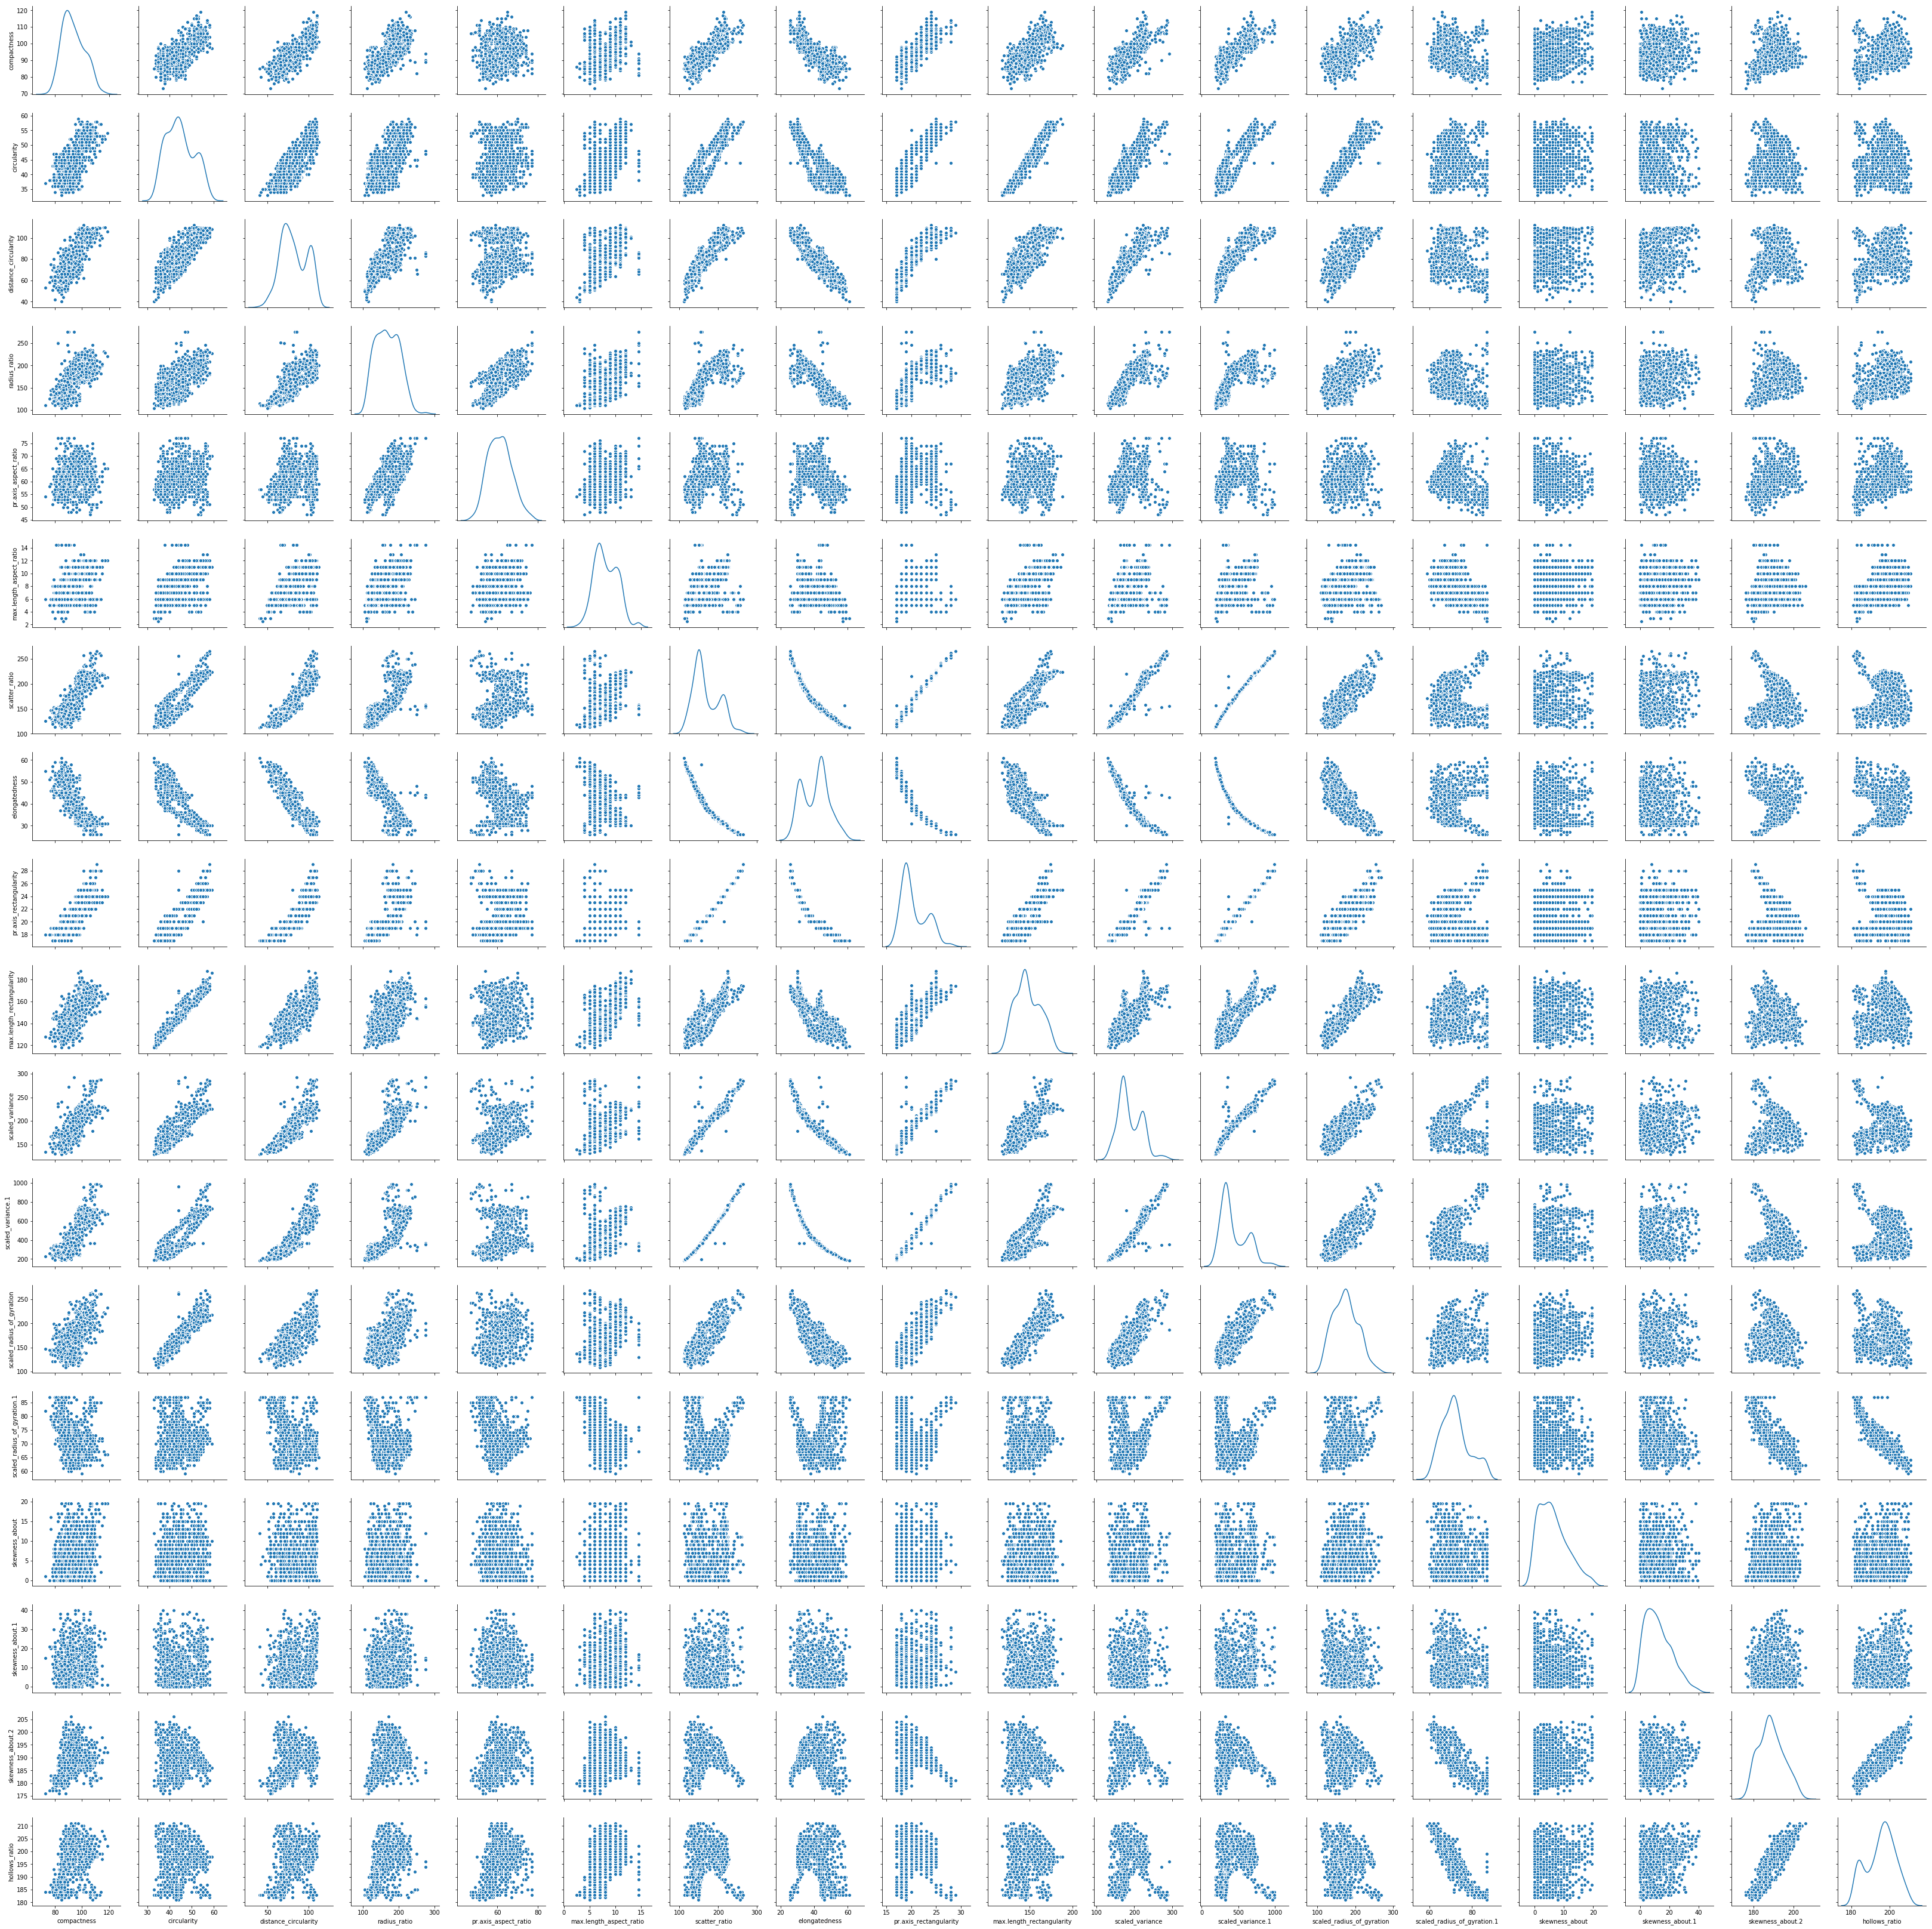

In [20]:
sns.pairplot(data,diag_kind='kde')

In [21]:
np.where(np.abs(data.corr())>0.9)

(array([ 0,  1,  1,  1,  2,  2,  2,  3,  4,  5,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 10, 10,
        11, 11, 11, 11, 11, 12, 12, 13, 13, 14, 15, 16, 17, 17],
       dtype=int64),
 array([ 0,  1,  9, 12,  2,  6,  7,  3,  4,  5,  2,  6,  7,  8, 10, 11,  2,
         6,  7,  8, 10, 11,  6,  7,  8, 10, 11,  1,  9,  6,  7,  8, 10, 11,
         6,  7,  8, 10, 11,  1, 12, 13, 17, 14, 15, 16, 13, 17],
       dtype=int64))

<b>'scatter_ratio' and 'elongatedness' columns have high correlation with other columns and can be eliminated.

In [24]:
data=data.drop(['scatter_ratio','elongatedness'],axis=1)

In [25]:
np.where(np.abs(data.corr())>0.9)

(array([ 0,  1,  1,  1,  2,  3,  4,  5,  6,  6,  6,  7,  7,  8,  8,  8,  9,
         9,  9, 10, 10, 11, 11, 12, 13, 14, 15, 15], dtype=int64),
 array([ 0,  1,  7, 10,  2,  3,  4,  5,  6,  8,  9,  1,  7,  6,  8,  9,  6,
         8,  9,  1, 10, 11, 15, 12, 13, 14, 11, 15], dtype=int64))

In [26]:
#Standardization of dat
sc=StandardScaler()
X=data.drop(['class'],axis=1)
data_scaled=sc.fit_transform(X)

C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
pca=PCA(n_components=16)
pca.fit_transform(data_scaled)

array([[ 0.7470425 , -0.55956165,  1.05228933, ...,  0.20869203,
        -0.02848699,  0.03748791],
       [-1.30146887, -0.3966714 , -0.7061844 , ...,  0.10553475,
        -0.02104928, -0.01030166],
       [ 3.52476794,  0.27989327,  0.58371014, ..., -0.01542067,
         0.07178139, -0.13534194],
       ...,
       [ 4.58877825, -0.04533187,  1.22131631, ...,  0.09451723,
        -0.00619848,  0.01202058],
       [-2.9253844 , -1.13058453, -1.44144859, ..., -0.22084049,
         0.1827662 , -0.0647871 ],
       [-4.34800782,  0.32994777, -1.07391219, ..., -0.11979284,
         0.15541744, -0.10378592]])

In [28]:
var_explained=pca.explained_variance_ratio_ 
cum_var_exp=np.cumsum(pca.explained_variance_ratio_)

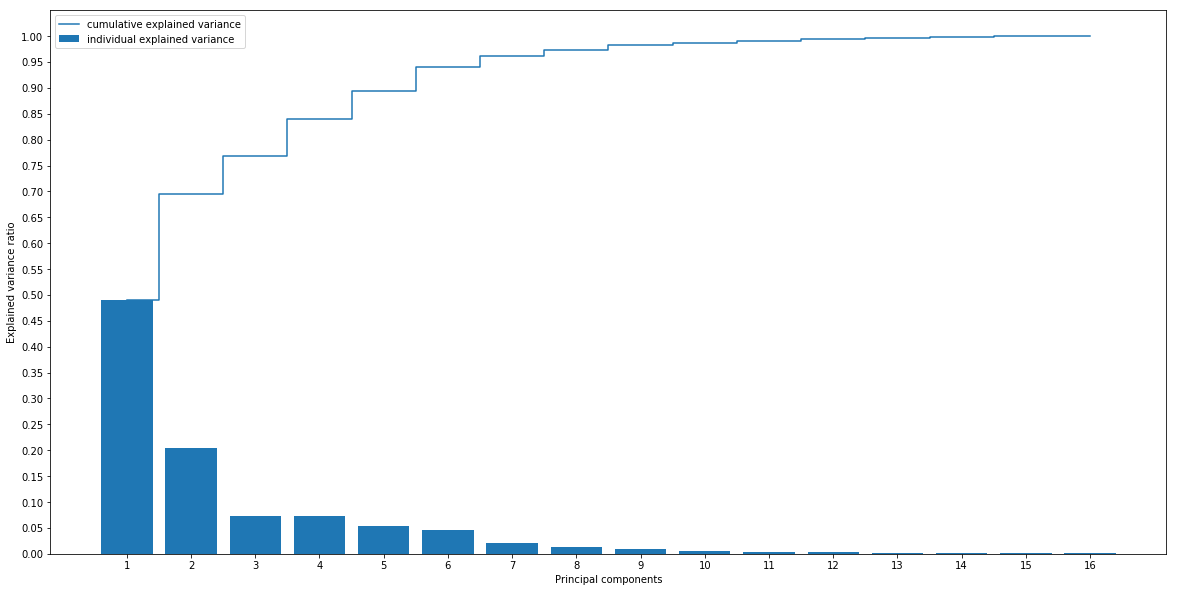

In [29]:
plt.figure(figsize=(20,10))
plt.bar(range(1,17), var_explained, alpha=1, align='center', label='individual explained variance')
plt.step(range(1,17),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.xticks(np.arange(1,17))
plt.yticks(np.arange(0,1.05,step=0.05))
plt.show()

<b>First 7 principal components explain more than 95% variance

In [30]:
pd.DataFrame(pca.components_[:7],columns=X.columns,index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
PC1,0.304280,0.322032,0.335845,0.300654,0.114333,0.214619,0.336488,0.313400,0.329575,0.335387,0.293615,-0.055475,0.052254,0.062776,0.048120,0.102809
PC2,-0.079198,0.146634,-0.036376,-0.181235,-0.235818,-0.089012,0.098464,0.136514,0.087937,0.092759,0.225753,0.499618,-0.034779,-0.098914,-0.507795,-0.510318
PC3,-0.137019,0.131986,-0.135437,0.184349,0.560111,0.036385,-0.134576,0.098362,-0.053917,-0.119879,0.153503,0.075016,-0.072082,-0.717603,0.028105,-0.035147
PC4,0.144421,0.106653,-0.023363,-0.219437,-0.345118,0.066711,-0.055191,0.135391,-0.149321,-0.065924,0.106365,-0.139414,0.766499,-0.343421,0.084600,0.064234
PC5,0.183180,-0.106476,-0.076875,0.156456,0.135993,-0.780569,0.135187,-0.246477,0.197366,0.187094,0.033222,0.116991,0.247830,-0.029263,0.229927,-0.118408
PC6,-0.162076,-0.052437,-0.032324,0.187580,0.487627,0.210519,-0.100620,-0.063997,-0.032395,-0.118595,-0.008091,0.225248,0.558032,0.461876,-0.197195,-0.094342
PC7,0.358836,-0.386939,0.099445,0.180561,-0.064779,0.374618,0.101675,-0.329690,0.204841,0.096248,-0.440715,0.166332,0.066076,-0.320472,-0.119508,-0.144863


In [31]:
pca_final=PCA(n_components=7)
new_dim=pca_final.fit_transform(data_scaled)
new_dim.shape

(846, 7)

In [32]:
#SVM
svc = svm.SVC(gamma="scale")
parameters = {'kernel':('linear', 'rbf'), 'C':[ 0.01, 0.05, 0.5, 1]}

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(new_dim, data['class'],test_size=0.2,random_state=1)

In [34]:
clf = GridSearchCV(svc, parameters, cv=5)
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.01, 0.05, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
model=clf.fit(X_train, Y_train)

In [36]:
model.score(X_train, Y_train)

0.9245562130177515

In [37]:
model.score(X_test,Y_test)

0.9294117647058824

In [38]:
Y_pred=model.predict(X_test)

In [39]:
confusion_matrix(Y_test,Y_pred)

array([[34,  2,  1],
       [ 2, 84,  4],
       [ 0,  3, 40]], dtype=int64)

In [40]:
precision,recall,fscore,support=precision_recall_fscore_support(Y_test,Y_pred)

In [41]:
print(precision)

[0.94444444 0.94382022 0.88888889]


In [42]:
print(recall)

[0.91891892 0.93333333 0.93023256]


In [43]:
print(fscore)

[0.93150685 0.93854749 0.90909091]
